In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [3]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.c1 = nn.Conv2d(1, 6, kernel_size=5)
        self.s2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.c3 = nn.Conv2d(6, 16, kernel_size=5)
        self.s4 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.c5 = nn.Conv2d(16, 120, kernel_size=5)
        self.f6 = nn.Linear(120, 84)
        self.output = nn.Linear(84, 10)

    def forward(self, x):
        x = F.tanh(self.c1(x))
        x = self.s2(x)
        x = F.tanh(self.c3(x))
        x = self.s4(x)
        x = F.tanh(self.c5(x))
        x = torch.flatten(x, 1)
        x = F.tanh(self.f6(x))
        x = self.output(x)
        return F.softmax(x, dim=1)
model = LeNet5()
print(model)

LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (s2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (c5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
# Transform for MNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32 to match the input size of LeNet-5
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST('E:\puzzle\data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('E:\puzzle\data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [5]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [6]:
# Training function
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Testing function
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')


In [7]:
# Training and testing the model
for epoch in range(1, 11):  # 10 epochs
    train(model, train_loader, optimizer, criterion, epoch)
    test(model, test_loader, criterion)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300941
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.294414
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.222355


KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), './Lenet_Epoch10.pth')

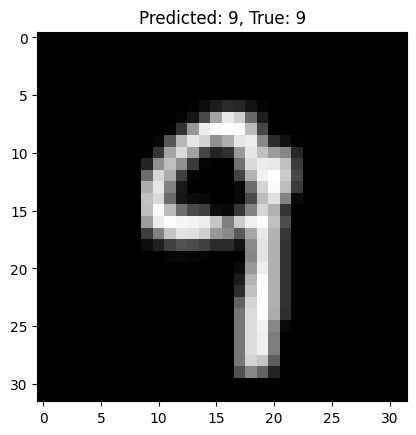

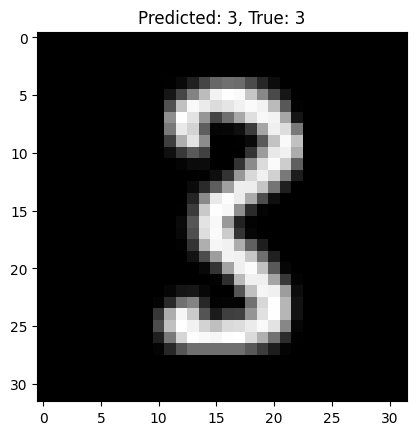

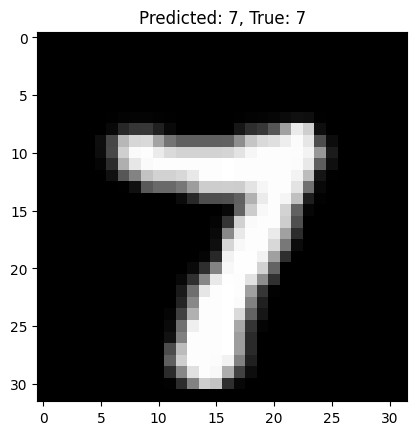

In [ ]:
import matplotlib.pyplot as plt

model = LeNet5()
model.load_state_dict(torch.load('Lenet_Epoch10.pth'))
model.eval()

def predict_and_show_image(model, image, label):
    image = image.unsqueeze(0)
    with torch.no_grad():
        output = model(image)
        pred = output.argmax(dim=1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Predicted: {pred.item()}, True: {label}')
    plt.show()

# Load a few images from the test dataset
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=True)
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Show and predict for the first 3 images
for i in range(3):
    predict_and_show_image(model, example_data[i], example_targets[i].item())